In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import HistGradientBoostingClassifier

In [25]:
diabetes_code = set([253,357,588,648,775])
seed = 1234

In [17]:
def read_data():
    data = pd.read_csv('diabetic_data.csv')
    return data

In [18]:
def extract_data(data):
    basic_data = data[['race','age','gender','diag_1']]
    # print(np.unique(basic_data['diag_1']))
    basic_data = basic_data[basic_data['diag_1'] != '?']
    #change y labels to 1 if in diabetes code else no
    basic_data['diag_1'] = basic_data['diag_1'].apply(lambda x: 1 if x.startswith("250") else 0)
    diabetic_data = basic_data[basic_data['diag_1'] == 1]
    non_diabetic_data = basic_data[basic_data['diag_1'] == 0]
    non_diabetic_data = non_diabetic_data.sample(n=len(diabetic_data), random_state=1234)
    balanced_data = pd.concat([diabetic_data, non_diabetic_data])
    race = balanced_data[['race']]
    other = balanced_data[['age','gender','diag_1']]
    
    # print(len(basic_data[basic_data['diag_1'] == 1]))
    # print(len(basic_data))
    
    imp = SimpleImputer(missing_values='?', strategy="constant", fill_value="other")
    clean_race = imp.fit_transform(race)
    # print(len(clean_race))
    np_data = other.to_numpy()
    # print(np_data)
    clean_data = np.concatenate((clean_race, np_data),axis=1)
    print(clean_data)
    #add other stuff here for other types of data needed to extract
    return clean_data

In [19]:
data = read_data()
basic = extract_data(data)

[['Caucasian' '[0-10)' 'Female' 1]
 ['AfricanAmerican' '[40-50)' 'Female' 1]
 ['AfricanAmerican' '[40-50)' 'Female' 1]
 ...
 ['Hispanic' '[50-60)' 'Male' 0]
 ['Caucasian' '[90-100)' 'Male' 0]
 ['Caucasian' '[40-50)' 'Female' 0]]


In [20]:
def startData(data, start, end):  #input is df
    # data = data.to_numpy()
    # print(type(data))
    # print(len(data))
    # valid_idx = y.__index__
    # X = preprocess_data(data[:,start:end])  #get first three cols of data
    r = data[:,0]
    print(r.reshape(1,-1))
    gender = data[:,2]
    print(gender)
    X = preprocess_data(np.hstack([r.reshape(len(data),1),gender.reshape(len(data),1)]))
    # y = preprocess_label(data[:,3])  #get last col = diagnosis
    y = np.array(data[:,3]).astype(int)
    # print(type(y))    #ndarray
    print(X)
    print(y)
    X_tr, y_tr, X_va, y_va, X_te, y_te = separateData(X,y)  #
    # print(y_tr)
    return X_tr, y_tr, X_va, y_va, X_te, y_te

def separateData(X_data, y_data):
    X_temp, X_te, y_temp, y_te = train_test_split(X_data, y_data, test_size=0.2 ,random_state=1234, shuffle=True)
    X_tr, X_va, y_tr, y_va = train_test_split(X_temp, y_temp, test_size=0.15 ,shuffle=True, random_state=1234)
    return X_tr, y_tr, X_va, y_va, X_te, y_te
    
def preprocess_data(data):
    # data.replace('?',"other",inplace=True)
    print(data)
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(data)
    return encoded_data

def preprocess_label(labels):
    # labels = labels[labels != '?']
    print("original", labels)
    lb = LabelBinarizer()
    binary_label = lb.fit_transform(labels)
    return binary_label

In [21]:
X_tr, y_tr, X_va, y_va, X_te, y_te = startData(basic,1,3)

[['Caucasian' 'AfricanAmerican' 'AfricanAmerican' ... 'Hispanic'
  'Caucasian' 'Caucasian']]
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Female']
[['Caucasian' 'Female']
 ['AfricanAmerican' 'Female']
 ['AfricanAmerican' 'Female']
 ...
 ['Hispanic' 'Male']
 ['Caucasian' 'Male']
 ['Caucasian' 'Female']]
[[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
[1 1 1 ... 0 0 0]


In [66]:
clf = HistGradientBoostingClassifier(max_depth = 4, random_state=seed)
clf.fit(X_tr, y_tr)

print(clf.score(X_tr, y_tr))
print(clf.score(X_va, y_va))
print(clf.score(X_te, y_te))


0.5596607607691662
0.5499524262607041
0.545246931201827


In [46]:
#test for depth
def errors_for_varying_depth(X_tr: np.array, y_tr: np.array, X_va:np.array, y_va: np.array, X_te: np.array, y_te: np.array, seed: int, depth: list[int]) -> tuple[list, list, list, list]:
    # append error rates to the following lists
    tr_err_dt = [] # training error rates
    va_err_dt = [] #validation error rattes 
    te_err_dt = [] # testing error rates 

    ### YOUR CODE STARTS HERE ###
    # get_learning_curve(map, X_tr, y_tr)
    #for loop
    for i in depth:
        clf = HistGradientBoostingClassifier(max_depth = i, random_state=seed)
        # print(X_tr)
        # print(y_tr)
        clf.fit(X_tr,y_tr)
        # res = mlp.predict(X_tr[:i])
        tr_err_dt.append(1-clf.score(X_tr,y_tr))
        # print(tr_err_mlp)
        va_err_dt.append(1-clf.score(X_va,y_va))
        # res = mlp.predict(X_te[:i])
        te_err_dt.append(1-clf.score(X_te,y_te))
        # print(X_tr[:i])
        # print(y_tr[:i])
    print(tr_err_dt)
    print(va_err_dt)
    print(te_err_dt)
    # print(X_tr[:50])
    ###  YOUR CODE ENDS HERE  ###
    return tr_err_dt, va_err_dt, te_err_dt # DO NOT CHANGE THIS LINE    

In [47]:
def plot_errors_for_varying_depth_dt(tr_err: list, te_err: list, va_err: list, depth: list[int]) -> None:
    ### YOUR CODE STARTS HERE ###
    # Please use semilogx to plot
    plt.figure(figsize=(10, 6))
    plt.plot(depth, tr_err, label='Training Error Rate')
    plt.plot(depth, te_err, label='Testing Error Rate')
    plt.plot(depth, va_err, label='Validation Error Rate')
    plt.xlabel('Max Depth')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs. Max Depth of Decision Tree')
    plt.legend()
    plt.grid(True)
    plt.show()
    ###  YOUR CODE ENDS HERE  ###

[0.4405071794441179, 0.44059114955075995, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385]
[0.4509990485252141, 0.4548049476688868, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594]
[0.45446759920068514, 0.45760776477305165, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173]


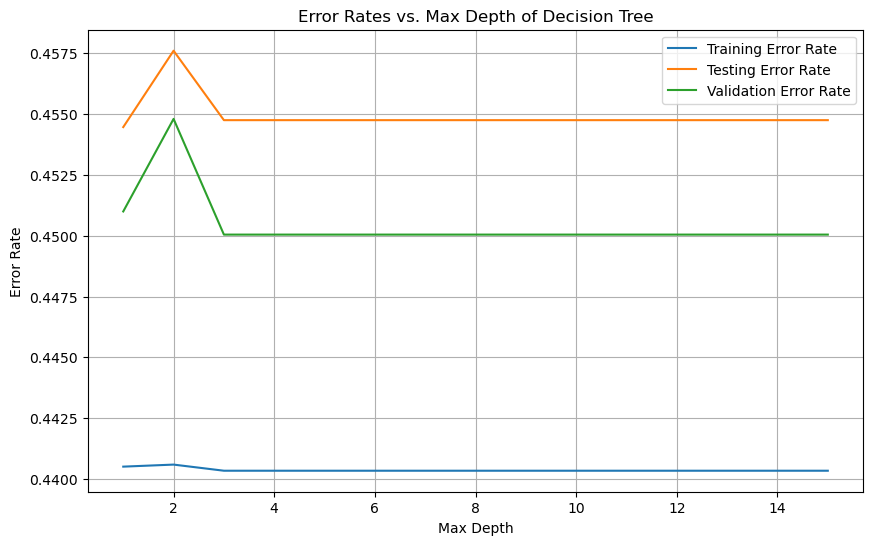

In [48]:
max_depth = range (1,16)
# train_sizes = [50, 500]
# print(X_tr)
tr_err_mlp, va_err_mlp, te_err_mlp = errors_for_varying_depth(X_tr, y_tr, X_va, y_va, X_te, y_te, seed, max_depth)
plot_errors_for_varying_depth_dt(tr_err_mlp, te_err_mlp, va_err_mlp, max_depth)

In [52]:
#test for depth
def errors_for_varying_leafs(X_tr: np.array, y_tr: np.array, X_va:np.array, y_va: np.array, X_te: np.array, y_te: np.array, seed: int, min_leaf: list[int]) -> tuple[list, list, list, list]:
    # append error rates to the following lists
    tr_err_dt = [] # training error rates
    va_err_dt = [] #validation error rattes 
    te_err_dt = [] # testing error rates 

    ### YOUR CODE STARTS HERE ###
    # get_learning_curve(map, X_tr, y_tr)
    #for loop
    for i in min_leaf:
        clf = HistGradientBoostingClassifier(min_samples_leaf = i, random_state=seed)
        # print(X_tr)
        # print(y_tr)
        clf.fit(X_tr,y_tr)
        # res = mlp.predict(X_tr[:i])
        tr_err_dt.append(1-clf.score(X_tr,y_tr))
        # print(tr_err_mlp)
        va_err_dt.append(1-clf.score(X_va,y_va))
        # res = mlp.predict(X_te[:i])
        te_err_dt.append(1-clf.score(X_te,y_te))
        # print(X_tr[:i])
        # print(y_tr[:i])
    print(tr_err_dt)
    print(va_err_dt)
    print(te_err_dt)
    # print(X_tr[:50])
    ###  YOUR CODE ENDS HERE  ###
    return tr_err_dt, va_err_dt, te_err_dt # DO NOT CHANGE THIS LINE    

In [53]:
def plot_errors_for_min_lead_dt(tr_err: list, te_err: list, va_err: list, min_leaf: list[int]) -> None:
    ### YOUR CODE STARTS HERE ###
    # Please use semilogx to plot
    plt.figure(figsize=(10, 6))
    plt.plot(min_leaf, tr_err, label='Training Error Rate')
    plt.plot(min_leaf, te_err, label='Testing Error Rate')
    plt.plot(min_leaf, va_err, label='Validation Error Rate')
    plt.xlabel('min sampling leafs')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs. min sampling leafs')
    plt.legend()
    plt.grid(True)
    plt.show()
    ###  YOUR CODE ENDS HERE  ###

[0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385, 0.44033923923083385]
[0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594, 0.45004757373929594]
[0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173, 0.454753068798173]


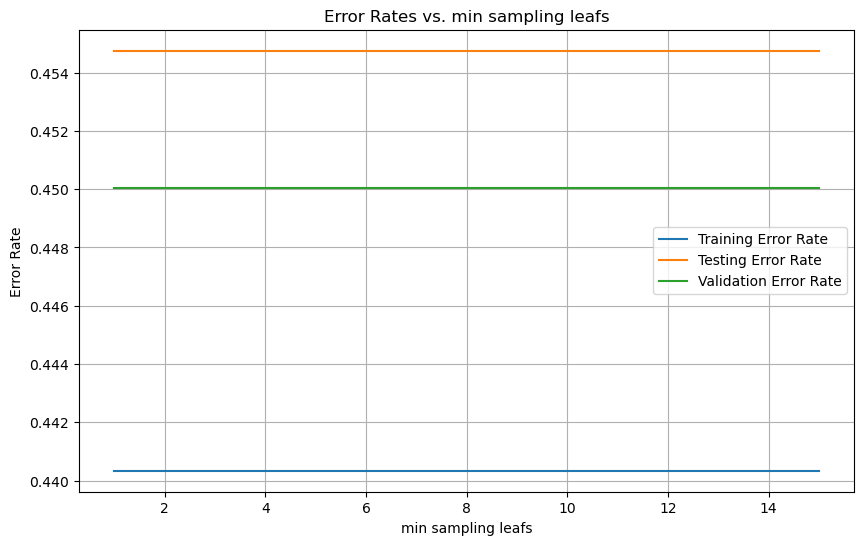

In [55]:
min_leaf_samples = range(1,16)
tr_err_mlp, va_err_mlp, te_err_mlp = errors_for_varying_leafs(X_tr, y_tr, X_va, y_va, X_te, y_te, seed, min_leaf_samples)
plot_errors_for_min_lead_dt(tr_err_mlp, te_err_mlp, va_err_mlp, min_leaf_samples)

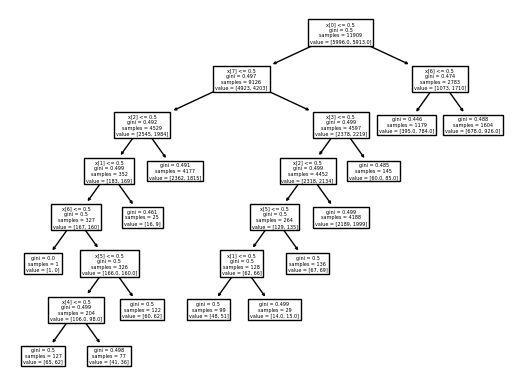

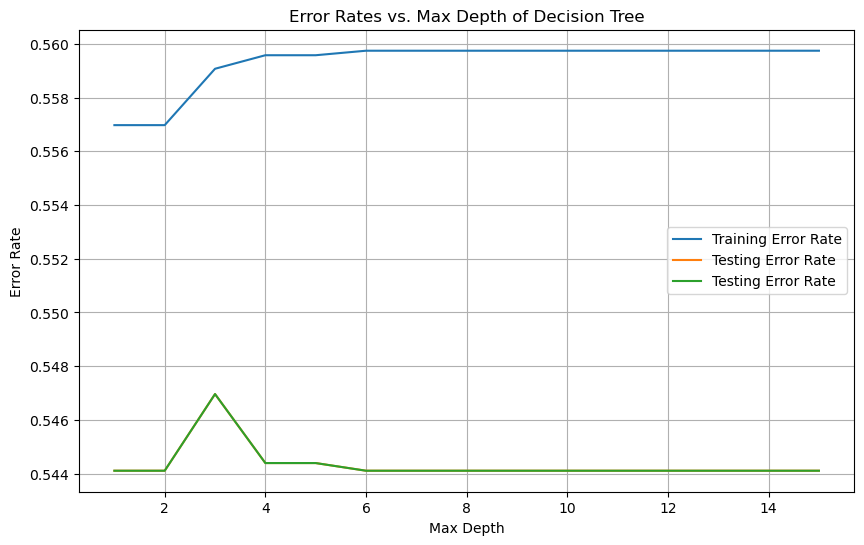

In [59]:
### YOUR CODE STARTS HERE ###
# train_sizes = [50, 500]
# print(X_tr)
training_error_rates = []
testing_error_rates = []
validating_error_rates = []
max_depths = range(1,16)
for i in max_depths:
    clf = DecisionTreeClassifier(max_depth = i,  random_state=seed)
    clf.fit(X_tr, y_tr)

    training_accuracy_tr = clf.score(X_tr, y_tr)
    training_error_rates.append(training_accuracy_tr)
    
    training_accuracy_te = clf.score(X_te, y_te)
    testing_error_rates.append(training_accuracy_te)

    training_accuracy_va = clf.score(X_va, y_va)
    validating_error_rates.append(training_accuracy_va)

    plot_tree(clf)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_error_rates, label='Training Error Rate')
plt.plot(max_depths, testing_error_rates, label='Testing Error Rate')
plt.plot(max_depths, testing_error_rates, label='Testing Error Rate')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Max Depth of Decision Tree')
plt.legend()
plt.grid(True)
plt.show()
    
###  YOUR CODE ENDS HERE  ###

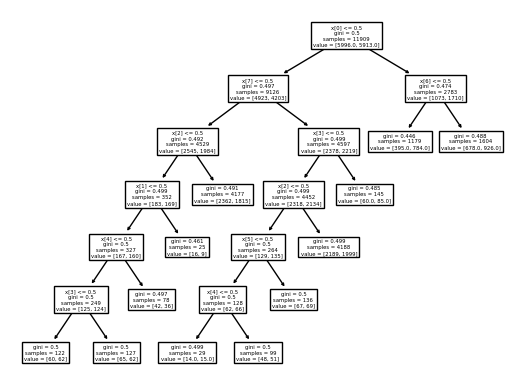

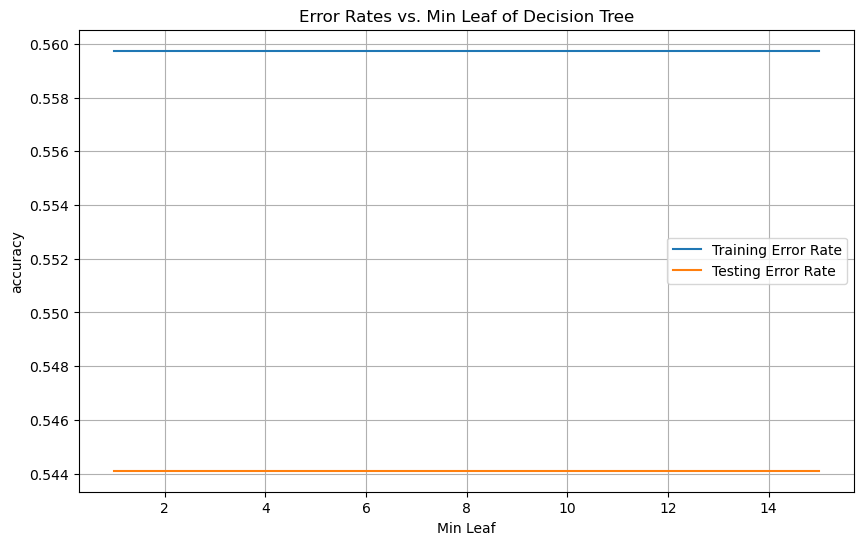

In [61]:
### YOUR CODE STARTS HERE ###
training_error_rates_ml = []
testing_error_rates_ml = []
validating_error_rates_ml = []
min_leaf_samples = range(1,16)
for i in min_leaf_samples:
    clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=i, random_state=seed)
    clf.fit(X_tr, y_tr)

    training_accuracy_tr = clf.score(X_tr, y_tr)
    training_error_rates_ml.append(training_accuracy_tr)

    training_accuracy_te = clf.score(X_te, y_te)
    testing_error_rates_ml.append(training_accuracy_te)

    training_accuracy_va = clf.score(X_va, y_va)
    validating_error_rates_ml.append(training_accuracy_va)

    plot_tree(clf)

plt.figure(figsize=(10, 6))
plt.plot(min_leaf_samples, training_error_rates_ml, label='Training Error Rate')
plt.plot(min_leaf_samples, testing_error_rates_ml, label='Testing Error Rate')
plt.xlabel('Min Leaf')
plt.ylabel('accuracy')
plt.title('Error Rates vs. Min Leaf of Decision Tree')
plt.legend()
plt.grid(True)
plt.show()
###  YOUR CODE ENDS HERE  ###